# Importing Libraries

In [ ]:
import numpy as np
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt


Dataset Link: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset

In [ ]:
from google.colab import drive
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Define the path to the ZIP file in Google Drive
zip_path = 'https://drive.google.com/file/d/1YvdQ0lsa5aqWB9OaLETU4oAfSDJckp5y/view?usp=sharing'  # Replace with the actual path to your ZIP file

In [ ]:
import zipfile
import os
import gdown

# Step 1: Download the file from Google Drive
# Replace the part after 'id=' in the URL with the actual file ID.
file_id = '1_5G3Cz0WQtZeTxzsq5lrTUfEnNy78WeY'
zip_file_path = '/content/plant.zip'

# Downloading the file using gdown
gdown.download(f'https://drive.google.com/uc?export=download&id={file_id}', zip_file_path, quiet=False)

# Step 2: Extract the zip file
extract_dir = '/content/plant'

# Create the directory if it doesn't exist
os.makedirs(extract_dir, exist_ok=True)

# Unzipping the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# Verify extracted files
os.listdir(extract_dir)

Downloading...
From (original): https://drive.google.com/uc?export=download&id=1_5G3Cz0WQtZeTxzsq5lrTUfEnNy78WeY
From (redirected): https://drive.google.com/uc?export=download&id=1_5G3Cz0WQtZeTxzsq5lrTUfEnNy78WeY&confirm=t&uuid=30578b9f-0807-43b2-be3f-9a3c3ad91d34
To: /content/plant.zip
100%|██████████| 1.49G/1.49G [00:23<00:00, 64.1MB/s]


['Plant_Disease_Dataset', '__MACOSX']

# Test set Image Processing

In [ ]:
efficientnet_model = tf.keras.models.load_model('/content/trained_plant_disease_efficientnet_model-2.keras')

In [ ]:
import tensorflow as tf

# Example of creating validation_set
image_size = (224, 224)
batch_size = 32
data_dir = '/content/plant/Plant_Disease_Dataset/valid'  # Update with your path

# Create ImageDataGenerator with validation split
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    validation_split=0.2,  # 20% for validation
    rescale=1./255,
)

# Load the validation set
dataset = datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True,
    subset='validation'  # Specify 'validation' to get the validation set
)

# Access class names
class_name = list(dataset.class_indices.keys())
print("Class Names:", class_name)


Found 3503 images belonging to 38 classes.
Class Names: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Sp

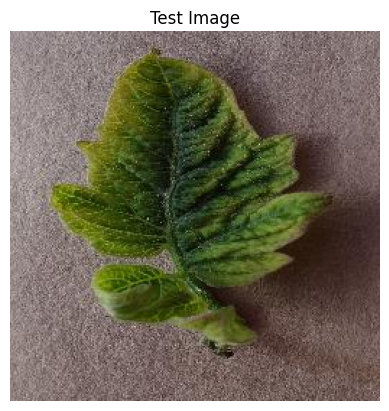

In [ ]:
import cv2
import matplotlib.pyplot as plt

image_path = '/content/plant/Plant_Disease_Dataset/test/test/TomatoYellowCurlVirus1.JPG'
img = cv2.imread(image_path)

# Check if the image was loaded successfully
if img is None:
    print("Image not found or failed to load. Check the path.")
else:
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Converting BGR to RGB
    plt.imshow(img)
    plt.title('Test Image')
    plt.axis('off')
    plt.show()

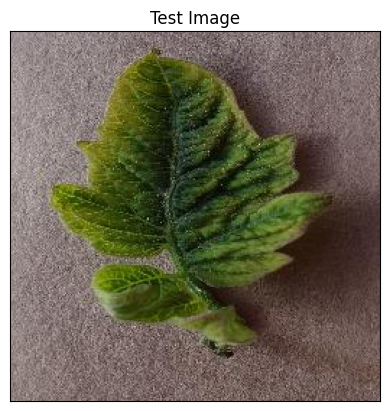

In [ ]:
# Displaying the image
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
# Preprocess image for EfficientNet
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = tf.keras.applications.efficientnet.preprocess_input(input_arr)  # Normalize for EfficientNet
input_arr = np.array([input_arr])  # Convert single image to a batch

In [ ]:
# Predict the class
predictions = efficientnet_model.predict(input_arr)
print("Prediction Probabilities:", predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
Prediction Probabilities: [[6.7904748e-10 5.2233145e-11 2.5567773e-12 1.9183741e-12 1.6848464e-10
  3.2225314e-10 8.1837664e-15 7.8299564e-08 2.1661093e-11 1.0170285e-10
  3.7743805e-11 2.3552948e-10 1.4507937e-06 5.6112803e-09 1.2851773e-12
  1.3600619e-11 3.1255387e-12 9.0492522e-13 8.3045286e-11 4.6759769e-13
  1.9123690e-11 7.6560919e-12 8.9728771e-12 2.1155758e-08 3.7429622e-13
  5.8412134e-12 5.3209749e-07 1.9308980e-06 2.6088916e-08 8.2041326e-05
  3.1537322e-06 8.3432498e-04 1.8898597e-04 1.4403205e-06 7.9274432e-05
  9.9036366e-01 8.4427446e-03 3.0946410e-07]]


In [ ]:
result_index = np.argmax(predictions)  # Return index of max element
print("Predicted Class Index:", result_index)

Predicted Class Index: 35


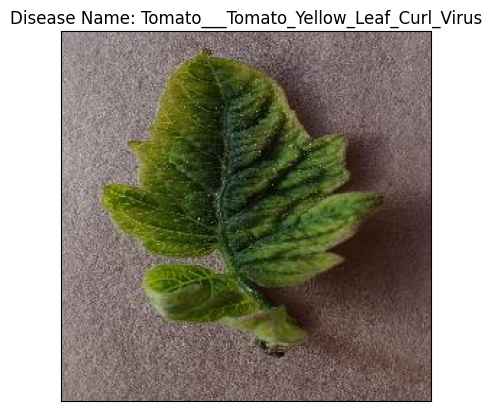

In [ ]:
# Display the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()